# Random Forest

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

İçindekiler

1. [Kütüphanelerin İçe Aktarılması](#kütüphanelerin-içe-aktarılması)  
2. [Veri Setinin Yüklenmesi](#veri-setinin-yüklenmesi)  
3. [Eksik Verilerin İncelenmesi](#eksik-verilerin-incelenmesi)  
4. [Veri Temizleme](#veri-temizleme)  
   - Eksik değerlerin kaldırılması  
   - `sex` sütunundaki hatalı değerlerin düzeltilmesi  
5. [Keşifsel Veri Analizi (EDA)](#keşifsel-veri-analizi-eda)  
   - Tanımlayıcı istatistikler  
   - Benzersiz değerlerin incelenmesi (`species`, `island`, `sex`)  
   - Tür dağılımı grafikleri (countplot)  
   - Dağılım grafikleri (scatterplot)  
   - Ortak dağılım grafiği (jointplot)  
   - Kutu grafikleri (boxplot)  
   - Değişken ilişkileri (pairplot)  
   - Korelasyon ısı haritası (heatmap)  
6. [Veri Hazırlama](#veri-hazırlama)  
   - Kategorik değişkenlerin dummy değişkenlere dönüştürülmesi  
   - Eğitim ve test verilerinin ayrılması  
7. [Random Forest Modelinin Kurulması ve Eğitimi](#random-forest-modelinin-kurulması-ve-eğitimi)  
   - Modelin tanımlanması  
   - Modelin eğitilmesi ve tahmin yapılması  
8. [Modelin Değerlendirilmesi](#modelin-değerlendirilmesi)  
   - Karışıklık matrisi (confusion matrix)  
   - Sınıflandırma raporu (classification report)  
   - Özellik önem dereceleri (feature importance)  
9. [Model Optimizasyonu](#model-optimizasyonu)  
   - Farklı ağaç sayılarıyla hata oranının incelenmesi  
   - Hata oranı grafiğinin çizilmesi  
10. [Son Doğruluk (Accuracy) Hesabı](#son-doğruluk-accuracy-hesabı)

In [84]:
df = pd.read_csv(filepath_or_buffer='data/penguins.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Eksik Veriler

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [86]:
df.shape

(344, 7)

In [87]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [88]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [89]:
df.dropna(inplace=True)

In [90]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [91]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [92]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [93]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [94]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [95]:
# cinsiyetten '.' kaldıralım

df = df[df['sex'] != '.']

In [96]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [97]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: xlabel='species', ylabel='count'>

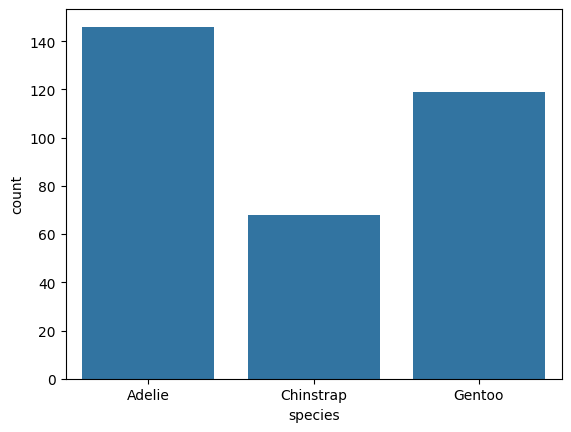

In [98]:
sns.countplot(x='species', data=df)

In [99]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

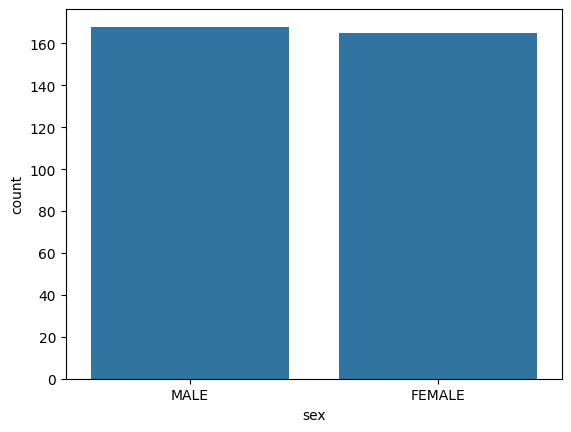

In [100]:
sns.countplot(x='sex', data=df)

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

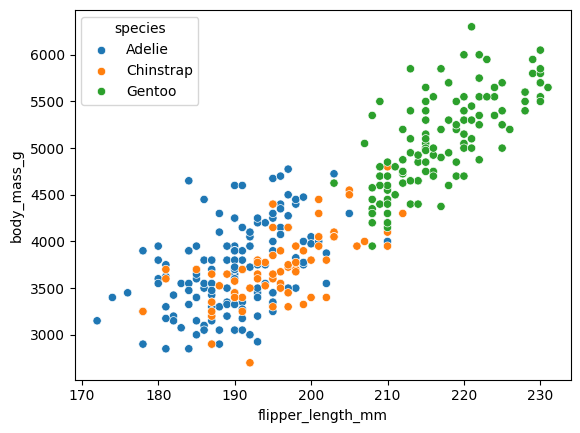

In [101]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df, hue='species')

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

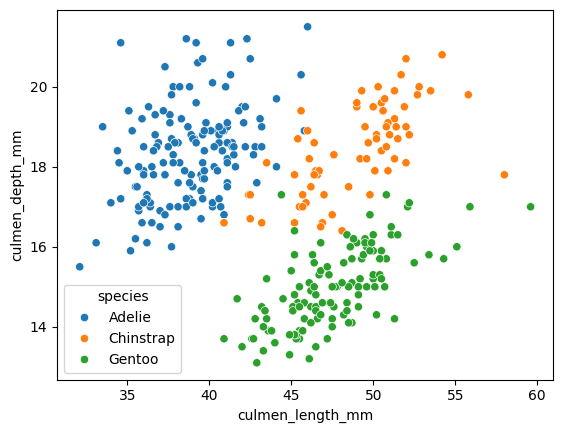

In [102]:
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, hue='species')

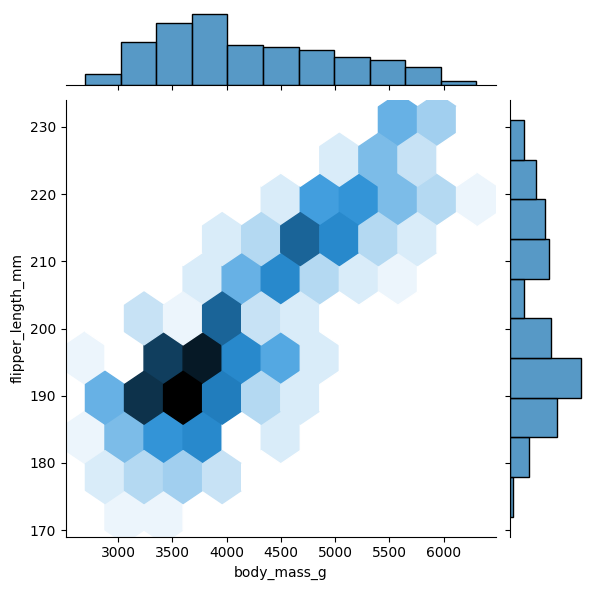

In [103]:
sns.jointplot(kind='hex', x='body_mass_g', y='flipper_length_mm', data=df,)

<Axes: xlabel='species', ylabel='culmen_length_mm'>

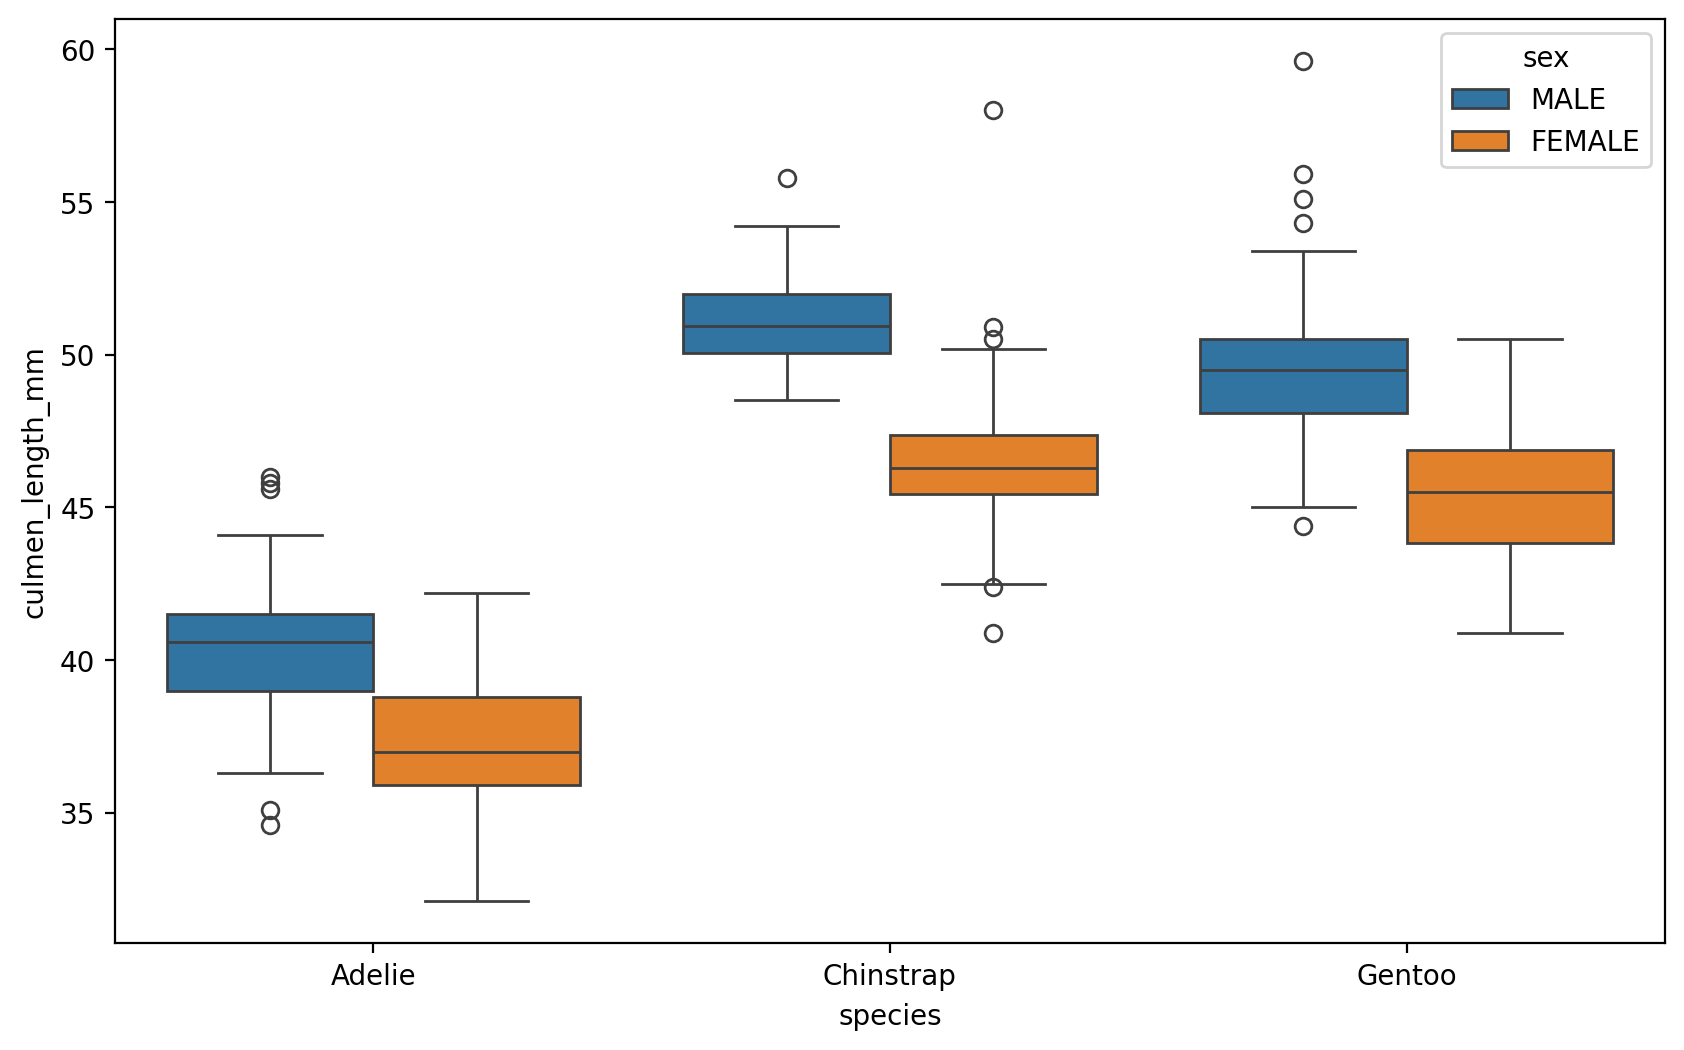

In [104]:
plt.figure(figsize=(10,6), dpi=200)

sns.boxplot(x='species', y='culmen_length_mm', data=df, hue='sex')

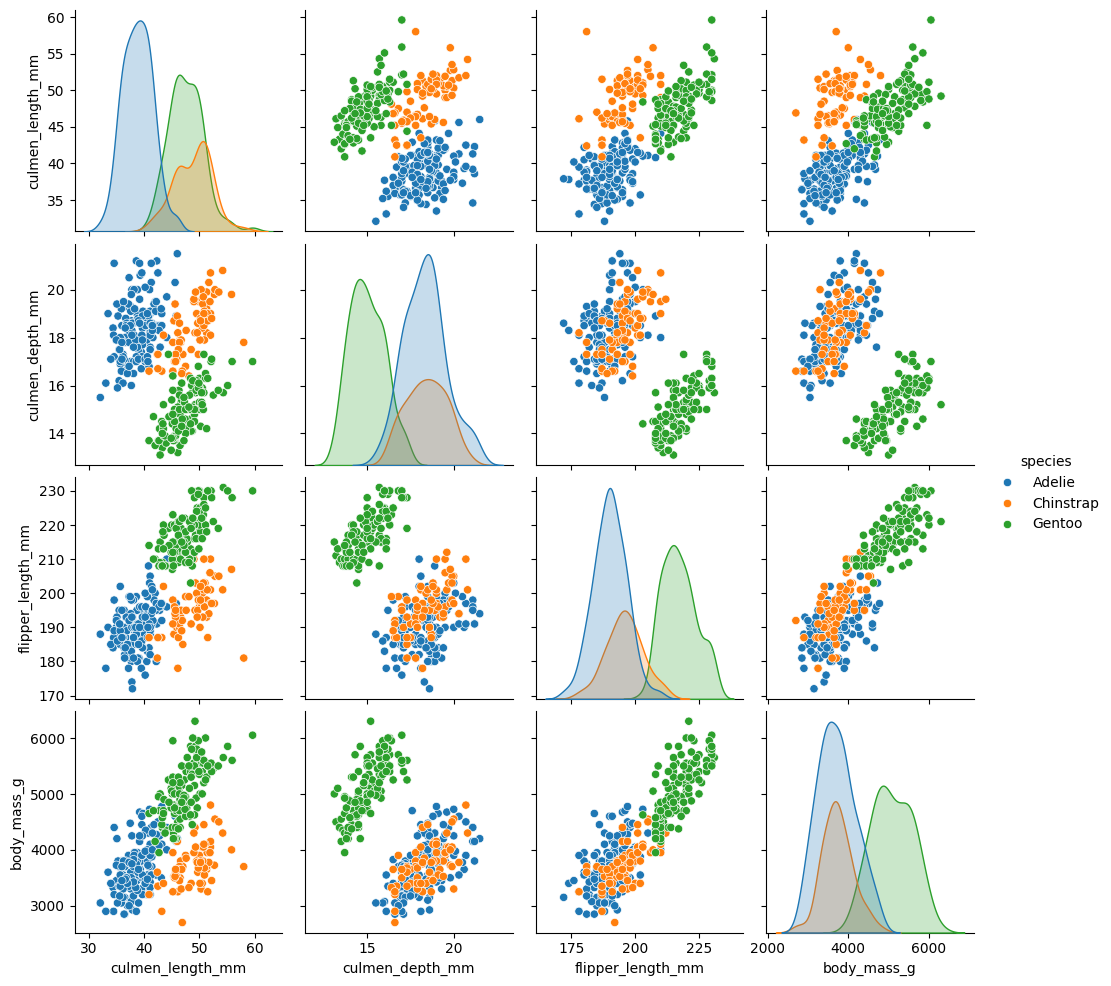

In [105]:
sns.pairplot(data=df, hue='species')

In [106]:
df.corr(numeric_only=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: >

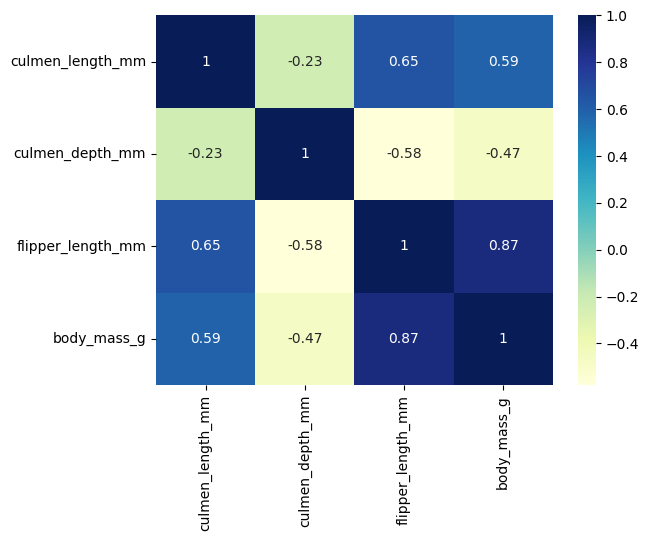

In [126]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')

## Train Test Split

In [108]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)

In [109]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


In [110]:
y = df['species']

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=9)

## Random Forest Model

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier(n_estimators=9, max_features='sqrt', random_state=9)

In [115]:
rf.fit(X_train, y_train)

,n_estimators,9
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [116]:
rf_pred = rf.predict(X_test)

Değerlendirme Teknikleri

In [117]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

In [119]:
confusion_matrix(y_test, rf_pred)

array([[44,  1,  1],
       [ 1, 22,  0],
       [ 1,  0, 30]])

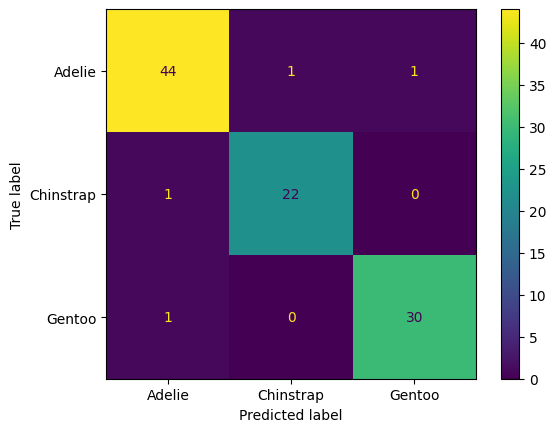

In [120]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [121]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

      Adelie       0.96      0.96      0.96        46
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       0.97      0.97      0.97        31

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [122]:
rf.feature_importances_

array([0.40410856, 0.03960461, 0.14964551, 0.20052233, 0.16789954,
       0.0315447 , 0.00667476])

In [123]:
hata = []

for n in range(1,99):
    rf = RandomForestClassifier(n_estimators=n, max_features='sqrt', random_state=9)
    rf.fit(X_train, y_train)
    test_pred = rf.predict(X_test)
    hata.append(1 - accuracy_score(test_pred, y_test))


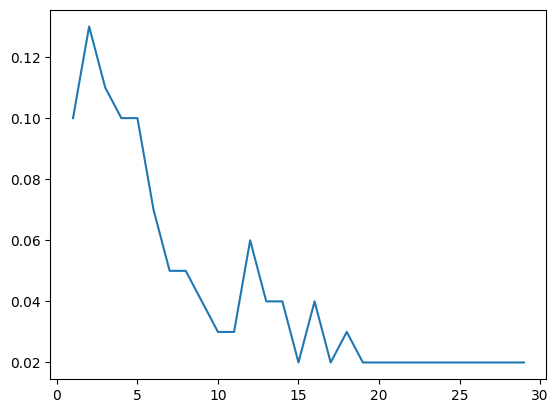

In [124]:
plt.plot(range(1,30), hata[:29], label = 'Hata Oranı')

In [125]:
1- hata[8]

0.96